# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data and Setup

Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Reading CSV File

In [3]:
df = pd.read_csv('/content/drive/911.csv')

DF Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


DF Head

In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Analysis

Top 5 zipcodes for 911 calls

In [6]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

Top 5 townships (twp) for 911 calls

In [7]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

Unique title codes

In [8]:
df['title'].nunique()

110

## Feature Engineering

In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. We create a new column called "Reason" that contains this string value.

Creating 'Reason' Column

In [9]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])

Most common Reason for a 911 call

In [10]:
df['Reason'].value_counts().head() ## EMS

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

Countplot of 911 calls by Reason

<Axes: xlabel='Reason', ylabel='count'>

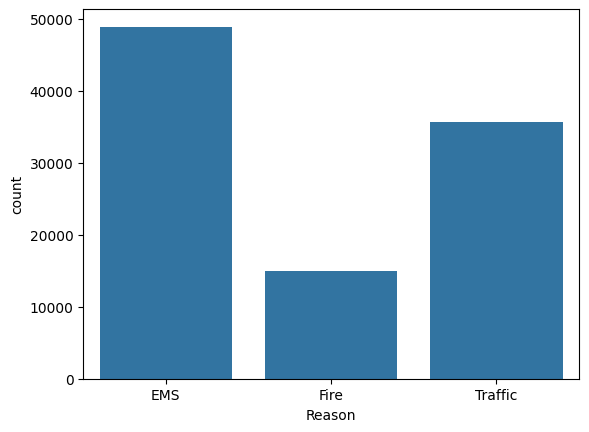

In [11]:
sns.countplot(x='Reason', data=df)

_____
Data type of the objects in the timeStamp column

In [12]:
type(df['timeStamp'].iloc[0])

str

Converting the column from strings to DateTime objects

In [13]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

Creating 3 new columns called Hour, Month, and Day of Week

In [14]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Day of Week'] = df['timeStamp'].apply(lambda x: x.day)

Mapping string names to Day of the Week

In [15]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [16]:
df['Day of Week'] = df['Day of Week'].map(dmap)

## Visualizations

Creating a countplot of the Day of Week column with the hue based off of the Reason column

<Axes: xlabel='Day of Week', ylabel='count'>

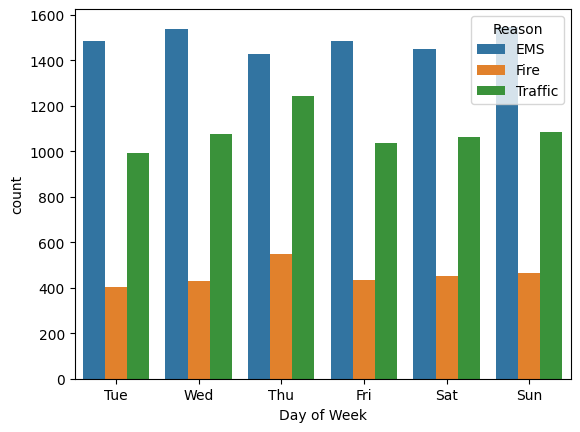

In [17]:
sns.countplot(x='Day of Week', data=df, hue='Reason')

Creating a countplot of Month column with the hue based off of the Reason column

<Axes: xlabel='Month', ylabel='count'>

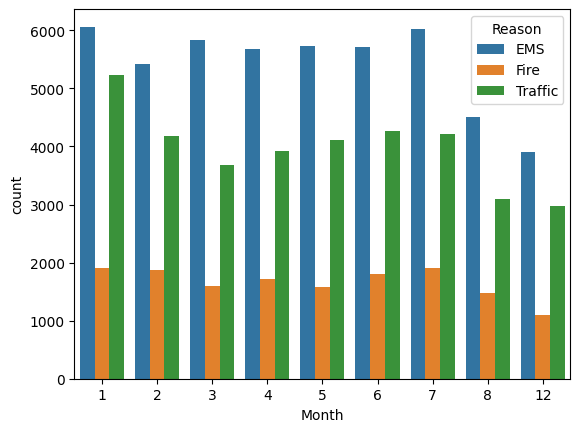

In [18]:
sns.countplot(x='Month', data=df, hue='Reason')

The data is missing some Months, so we see if we can fill in missing information by plotting the information in another way.

Creating a gropuby object called byMonth, to group the DataFrame by the month column and use the count() method for aggregation.


In [19]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,2206
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,2396
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,2127
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,2562
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,1963


Create a simple plot of the dataframe indicating the count of calls per month.

<Axes: xlabel='Month'>

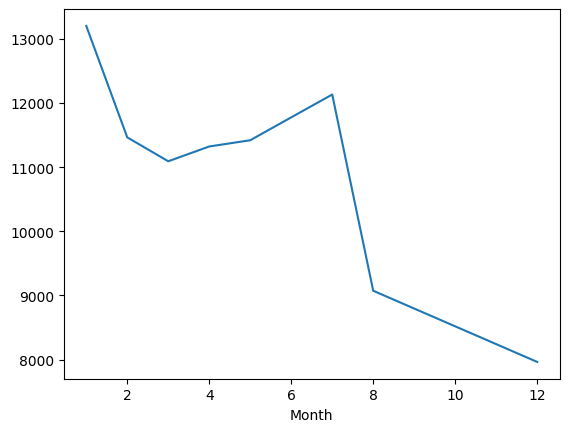

In [20]:
byMonth['twp'].plot()

Using seaborn's lmplot() to create a linear fit on the number of calls per month.

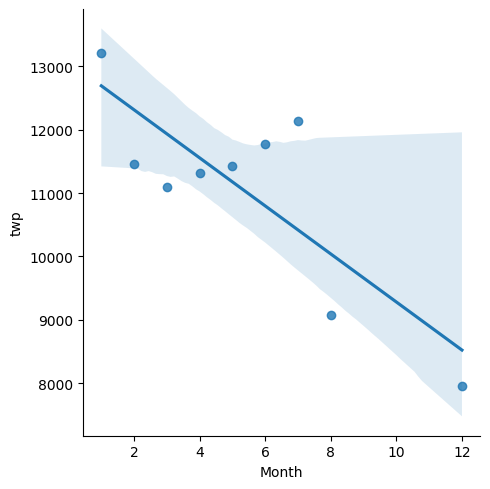

In [21]:
sns.lmplot(x='Month', y='twp', data=byMonth.reset_index())

Creating a new column called 'Date' that contains the date from the timeStamp column.

In [22]:
df['Date'] = df['timeStamp'].apply(lambda x: x.date())

Creating a gropuby object to group the DataFrame by the Date column and use the count() method for aggregation.

<Axes: xlabel='Date'>

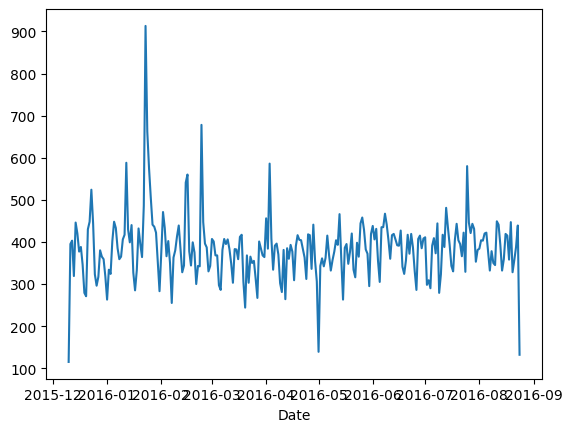

In [23]:
df.groupby('Date').count()['twp'].plot()

Creating 3 separate plots (one for each Reason for the 911 call)

<Axes: xlabel='Date'>

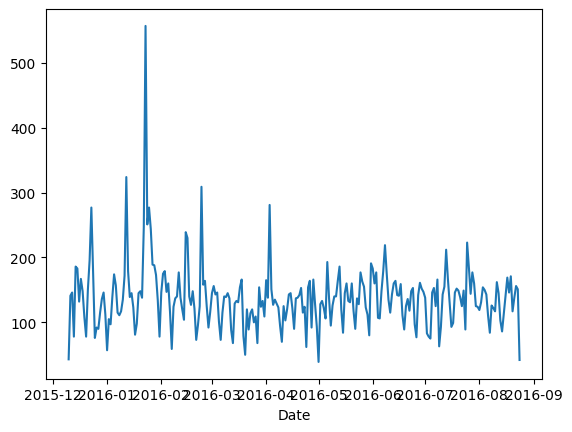

In [24]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()

<Axes: xlabel='Date'>

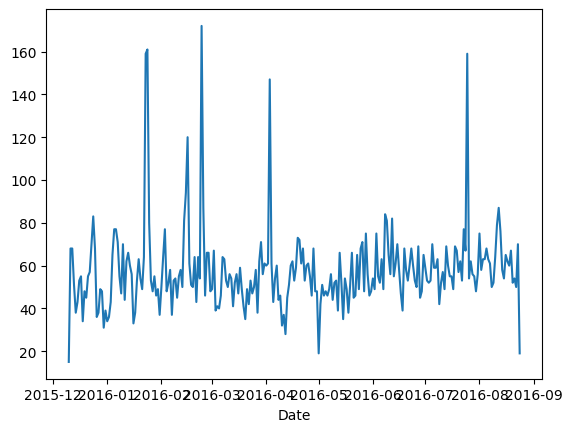

In [25]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()

<Axes: xlabel='Date'>

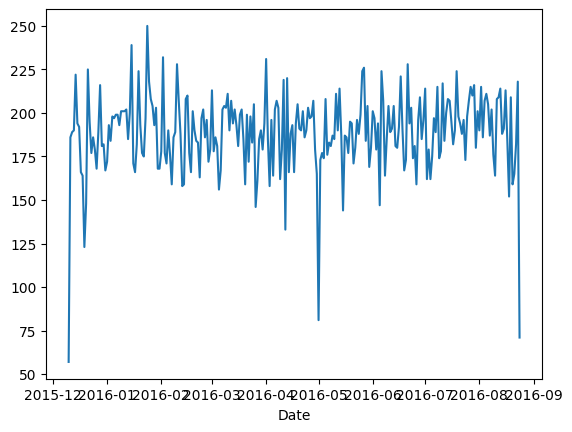

In [26]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()

____
Creating heatmaps with seaborn and our data.
We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week.

In [27]:
matrix = df.groupby(['Day of Week', 'Hour']).count()['Reason'].unstack()
matrix

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,72,50,40,42,34,48,75,146,148,149,...,169,157,192,195,152,142,148,116,119,85
Sat,61,54,58,37,41,42,87,132,161,139,...,190,171,196,210,192,133,105,115,92,79
Sun,58,55,38,51,36,49,89,131,138,174,...,207,188,201,224,155,161,126,95,119,99
Thu,62,42,32,55,62,61,107,190,187,225,...,173,205,196,181,166,147,120,109,84,65
Tue,75,41,53,41,43,67,74,133,163,141,...,177,184,181,201,157,125,118,82,70,65
Wed,58,59,45,52,35,41,88,168,168,171,...,181,155,194,198,176,141,129,109,97,96


Creating a HeatMap using the new DataFrame

<Axes: xlabel='Hour', ylabel='Day of Week'>

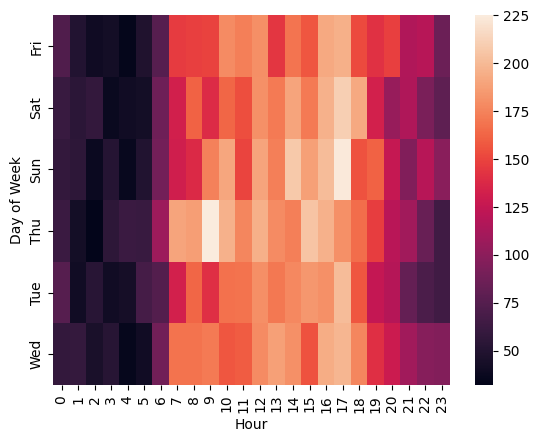

In [28]:
sns.heatmap(matrix)

Creating a ClusterMap using the new DataFrame

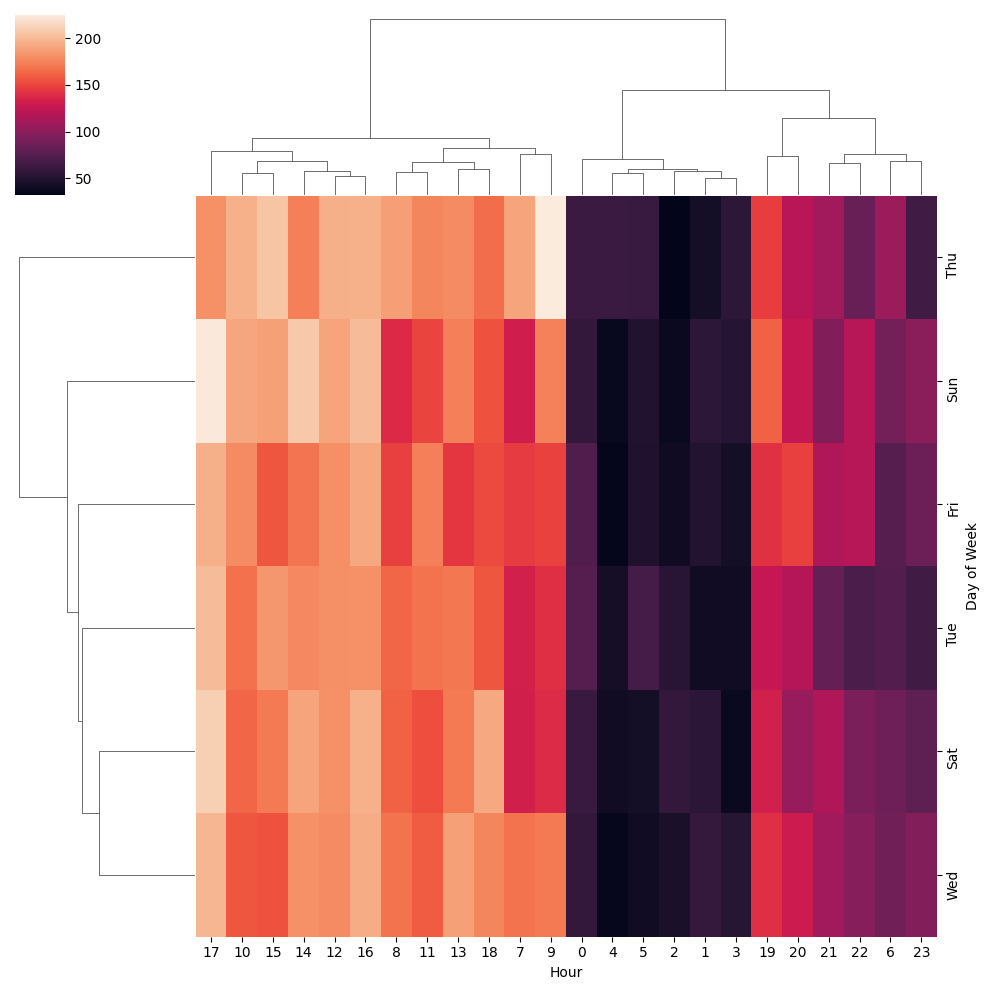

In [29]:
sns.clustermap(matrix)

Repeating for a DataFrame that shows the Month as the column

In [30]:
matrix2 = df.groupby(['Day of Week', 'Month']).count()['Reason'].unstack()
matrix2

Month,1,2,3,4,5,6,7,8
Day of Week,,,,,,,,
Fri,402,366,368,409,342,356,290,422
Sat,448,402,297,334,362,307,392,422
Sun,434,350,286,391,415,435,409,378
Thu,324,433,368,586,361,431,309,403
Tue,263,374,407,456,140,441,411,384
Wed,335,471,401,386,343,406,298,404


<Axes: xlabel='Month', ylabel='Day of Week'>

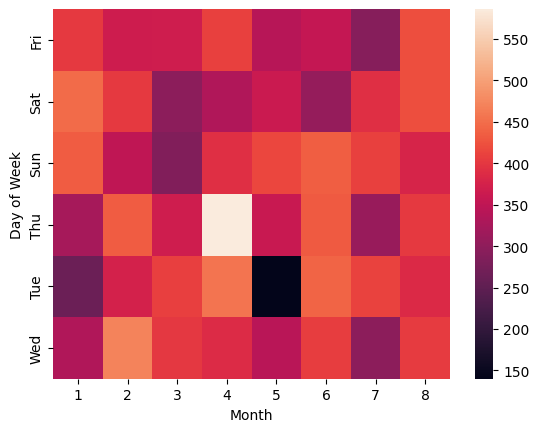

In [31]:
sns.heatmap(matrix2)

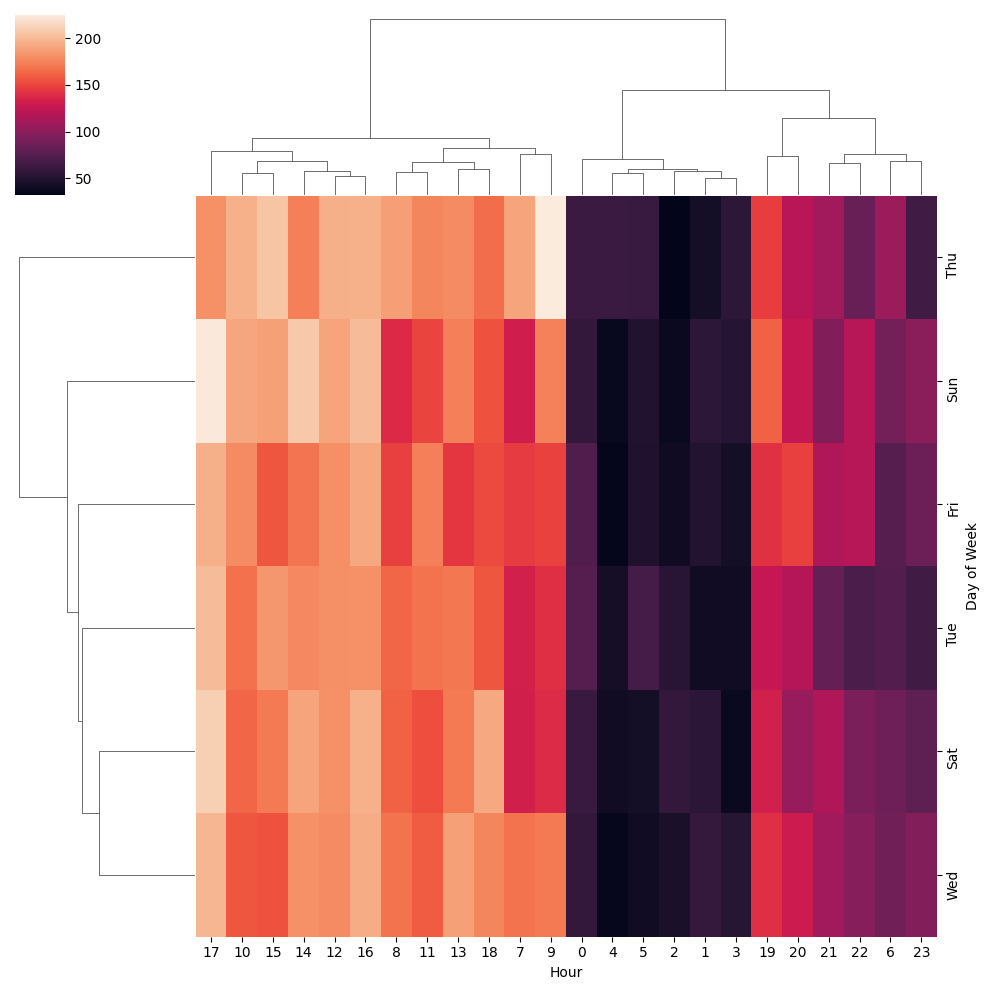

In [32]:
sns.clustermap(matrix)